# Question 1: Install and Import Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [34]:
%matplotlib inline

# Question 2: Import and Clean Data  

In [35]:
path = '/Users/seanward/Desktop/6- Achievement'

In [36]:
# Importing data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'worldometer_data_edited4.csv'))

In [37]:
df.shape

(191, 13)

In [38]:
df.head()

,Country/Region,Population,Total Cases,Total Deaths,% of Population With Covid,% of Cases that Result in Death,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,WHO Region,Country Test Rate,country_flag
0,USA,331198130,5032179,162804,1.52%,3.24%,15194,492.0,63139605,190640,Americas,0.190640,High Test Rate
1,Brazil,212710692,2917562,98644,1.37%,3.38%,13716,464.0,13206188,62085,Americas,0.062085,Medium Test Rate
2,India,1381344997,2025409,41638,0.15%,2.06%,1466,30.0,22149351,16035,South-EastAsia,0.016035,Lower Test Rate
3,Russia,145940924,871894,14606,0.60%,1.68%,5974,100.0,29716907,203623,Europe,0.203623,High Test Rate
4,South Africa,59381566,538184,9604,0.91%,1.79%,9063,162.0,3149807,53044,Africa,0.053044,Medium Test Rate


In [39]:
# Dropping categorical columns.

df = df.drop(columns = ['Country/Region', 'WHO Region', 'country_flag'])

In [40]:
df = df.drop(columns = ['% of Population With Covid', '% of Cases that Result in Death'])

In [41]:
df.head()

,Population,Total Cases,Total Deaths,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Country Test Rate
0,331198130,5032179,162804,15194,492.0,63139605,190640,0.190640
1,212710692,2917562,98644,13716,464.0,13206188,62085,0.062085
2,1381344997,2025409,41638,1466,30.0,22149351,16035,0.016035
3,145940924,871894,14606,5974,100.0,29716907,203623,0.203623
4,59381566,538184,9604,9063,162.0,3149807,53044,0.053044


# Question 3: Elbow Technique

In [42]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [43]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-2.265354325328942e+18,
 -4.3332475998143974e+17,
 -1.2833585826404483e+17,
 -6.106376909617949e+16,
 -3.279072872582099e+16,
 -2.1586847199328336e+16,
 -1.4941622107004992e+16,
 -1.1459390453588126e+16,
 -8286782563490518.0]

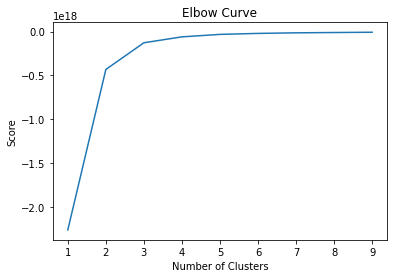

In [44]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Question 4: # of clusters to use:
The line seems to straighten out at 3 so I would say that the optimal count
for my clusters would be 3.


# Question 5 k-means algorithm

In [45]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [46]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/smw/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

# Question 6: New column

In [47]:
df['clusters'] = kmeans.fit_predict(df)

/Users/smw/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [48]:
df.head()

,Population,Total Cases,Total Deaths,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Country Test Rate,clusters
0,331198130,5032179,162804,15194,492.0,63139605,190640,0.190640,2
1,212710692,2917562,98644,13716,464.0,13206188,62085,0.062085,2
2,1381344997,2025409,41638,1466,30.0,22149351,16035,0.016035,1
3,145940924,871894,14606,5974,100.0,29716907,203623,0.203623,2
4,59381566,538184,9604,9063,162.0,3149807,53044,0.053044,0


In [49]:
df['clusters'].value_counts()

0    177
2     13
1      1
Name: clusters, dtype: int64

# Question 7: Create visualizations

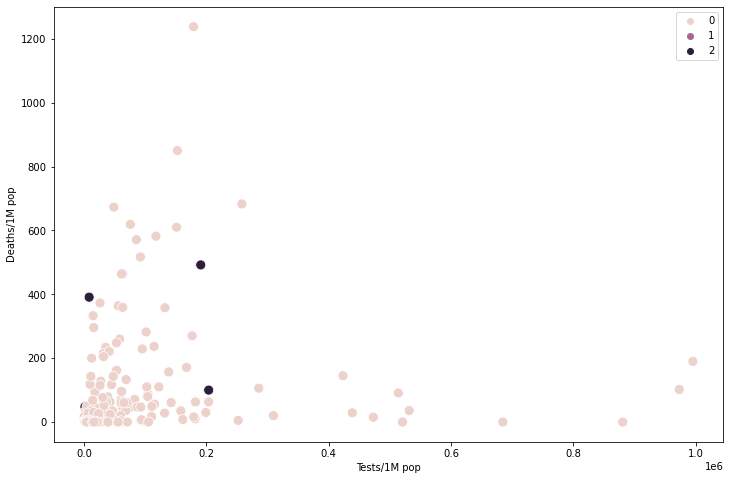

In [55]:
# Plot the clusters for the "Tests 1M/pop" and "Deaths/1M pop" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Tests/1M pop'], y=df['Deaths/1M pop'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Tests/1M pop') # Label x-axis.
plt.ylabel('Deaths/1M pop') # Label y-axis.
plt.show()

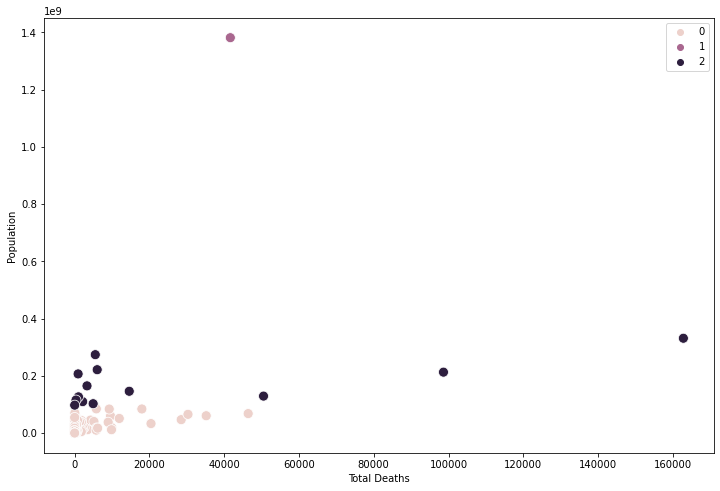

In [69]:
# Plot the clusters for the "Total Deaths" and "Population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Deaths'], y=df['Population'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Deaths') 
plt.ylabel('Population') 
plt.show()

# Question 8: Discuss how and why the clusters make sense:
# I don't think the clusters make all that much sense. There are too many values that are near zero and the clusters aren't really clustered together in a meaningful way.  I think the descriptive statistics for this data is more helpful.

In [66]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

# Question 9: Descriptive statistics.

In [67]:
df.groupby('cluster').agg({'Tests/1M pop':['mean', 'median'], 
                         'Deaths/1M pop':['mean', 'median'], 
                         'Total Deaths':['mean', 'median'],
                          'Population':['mean', 'median']})

Tests/1M pop        Deaths/1M pop         Total Deaths         \
                     mean median          mean median          mean median   
cluster                                                                      
dark purple  40131.230769   7432    122.930769   20.0  26989.615385   4951   
pink         87562.135593  37448     94.400452   28.0   1798.389831     65   
purple       16035.000000  16035     30.000000   30.0  41638.000000  41638   

               Population              
                     mean      median  
cluster                                
dark purple  1.720617e+08   145940924  
pink         1.358115e+07     5541604  
purple       1.381345e+09  1381344997

# It is interesting to look at the comparison of mean and median for both Tests/1M pop and Deaths/1M pop especially between dark purple and pink.  I can see that the purple has by far the most population and also the lowest test and death rate per 1M population.  Purple averages more deaths, but the population is so much higher that it is hard to compare them.

# Question 10: Usefulness in future steps of analytics pipeline
I could see how using this method may help unlock patterns that may not be so readily apparent at first glance.  In my case, it did not really do so.  To see these in clusters could help see connections that may not be prevelant when showing only one variable alone. 